<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Deep-Learning/RNN/Google_stock_price_prediction_1_time_stamp_and_1_LSTM_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('https://bit.ly/2Eoj9Is', parse_dates = ['Date'])
train.head(2)

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"


In [0]:
train = train.sort_values(by = 'Date')
train.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
train.tail()

,Date,Open,High,Low,Close,Volume
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300"
1257,2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"


**We need to train on single column of training data like Open or Close or Low or High, so choose only one of them**

In [0]:
train.shape

(1258, 6)

In [0]:
train = train.iloc[:, 1:2]
train[:2]

,Open
0,325.25
1,331.27


wee need numpy array to train our model so get it into numpy array

In [0]:
train = train.values
train[:2]

array([[325.25],
       [331.27]])

In [0]:
train.ndim

2

# Preprocessing

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
sc.fit(train)
train = sc.transform(train)
train[:2]

array([[0.08581368],
       [0.09701243]])

In [0]:
train.shape

(1258, 1)

# Make Training and testing data
**its very important part because in RNN we use time stamp of 1 means we predict the price of next day on the basis of current day 
means the input data(X_train) is current day and output (y_train) is the next day data**

In [0]:
X_train = train[:-1, :]
X_train[:2]

array([[0.08581368],
       [0.09701243]])

In [0]:
X_train.shape

(1257, 1)

In [0]:
y_train = train[1:]
y_train.shape

(1257, 1)

In [0]:
y_train[:2]

array([[0.09701243],
       [0.09433366]])

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1257, 1, 1)

# Make RNN

In [0]:
import tensorflow as tf

In [0]:
regressor2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 14, activation = 'sigmoid', input_shape = (None, 1)),
    tf.keras.layers.Dense(1)
   ])
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
regressor2.fit(X_train, y_train, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 2s 2ms/step - loss: 0.1836 - acc: 7.9554e-04
Epoch 2/200
1257/1257 [==============================] - 0s 269us/step - loss: 0.0956 - acc: 7.9554e-04
Epoch 3/200
1257/1257 [==============================] - 0s 251us/step - loss: 0.0737 - acc: 7.9554e-04
Epoch 4/200
1257/1257 [==============================] - 0s 255us/step - loss: 0.0699 - acc: 0.0016
Epoch 5/200
1257/1257 [==============================] - 0s 257us/step - loss: 0.0682 - acc: 0.0016
Epoch 6/200
1257/1257 [==============================] - 0s 263us/step - loss: 0.0664 - acc: 0.0016
Epoch 7/200
1257/1257 [==============================] - 0s 251us/step - loss: 0.0644 - acc: 0.0016
Epoch 8/200
1257/1257 [==============================] - 0s 252us/step - loss: 0.0624 - acc: 0.0016
Epoch 9/200
1257/1257 [==============================] - 0s 258us/step - loss: 0.0605 - acc: 0.0016
Epoch 10/200
1257/1257 [==============================] - 0s 256us/step - loss: 0.0583 - a

In [0]:
test = pd.read_csv('https://bit.ly/2B8hAKG', parse_dates = ['Date'])
test.head(2)

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"


In [0]:
t = test.iloc[:, 1:2].values
t = sc.transform(t)
t = np.reshape(t, (t.shape[0], 1, 1))
t[:2]

array([[[0.92955205]],

       [[0.94731751]]])

In [0]:
prediction = regressor2.predict(t)
prediction

array([[0.93230677],
       [0.949786  ],
       [0.9456136 ],
       [0.96241045],
       [0.9827846 ],
       [0.985454  ],
       [0.98022467],
       [0.9841376 ],
       [0.98475915],
       [0.984028  ],
       [0.9817057 ],
       [0.98044413],
       [0.98371714],
       [0.9843387 ],
       [1.011847  ],
       [1.02522   ],
       [1.0401777 ],
       [1.0345167 ],
       [0.9978849 ],
       [0.96533734]], dtype=float32)

In [0]:
prediction = sc.inverse_transform(prediction)
prediction

array([[780.2908 ],
       [789.68695],
       [787.44403],
       [796.4733 ],
       [807.42566],
       [808.86066],
       [806.04956],
       [808.153  ],
       [808.4871 ],
       [808.09406],
       [806.84576],
       [806.16754],
       [807.927  ],
       [808.2611 ],
       [823.04846],
       [830.23724],
       [838.2779 ],
       [835.23474],
       [815.543  ],
       [798.04675]], dtype=float32)

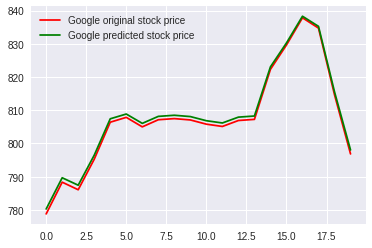

In [0]:
plt.plot(test.Open, label = 'Google original stock price', c = 'r')
plt.plot(prediction, label = 'Google predicted stock price', c = 'g')
plt.legend()

## Evaluating our model

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
rmse = np.sqrt(mean_squared_error(test.Open, prediction))
rmse

1.0334472829645844

it doesn't have any significant conclusion so we need to convet it into %age because in regression or test set may contain values between 1-10 or 1-1000 or any finite number so wee need to devide the rmse by mean value of our test set

In [0]:
mean = test.Open.mean()
mean

807.5260000000001

In [0]:
average_rmse = rmse/mean
average_rmse

0.0012797696705302173

## Plot real trainig stock price vs. the predicted training stock price

In [0]:
X_train[:2]

array([[[0.08581368]],

       [[0.09701243]]])

In [0]:
predicted_stock = regressor2.predict(X_train)
predicted_stock[:2]

array([[0.0903144],
       [0.1014693]], dtype=float32)

In [0]:
predicted_stock = sc.inverse_transform(predicted_stock)
predicted_stock[:2]

array([[327.6694 ],
       [333.66583]], dtype=float32)

In [0]:
train.head(1)

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"


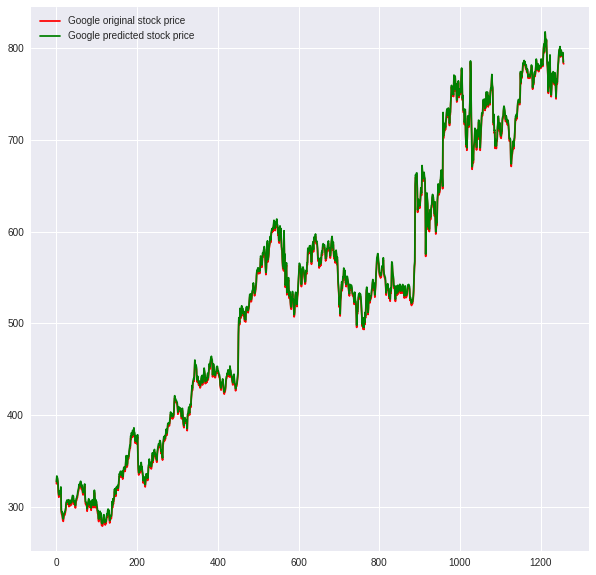

In [0]:
plt.figure(figsize = (10, 10))
plt.plot(train.Open, label = 'Google original stock price', c = 'r')
plt.plot(predicted_stock, label = 'Google predicted stock price', c = 'g')
plt.legend()